$$Conceito:$$



**Tipos de Redes Neurais Não Supervisionadas:**

**Máquinas de Boltzmann:**


- Rede neural Feed Forward de uma camada, com intuito de ajustar os pesos até que consiga reconstruir as variáveis de entrada com menos dimensões.


-  Objetivo é de aprender a distribuição de probabilidades dos inputs, usando a função de ativação,o Y é devolvido para camada oculta para reconstrução da variável e através do threshold determinar se o neuronio deve ser ativado ou não, no final é comparado o valor recontruido com o valor original para que assim consiga atualizar os pesos


- Caracteristicas: Não possui camada de saída, Entradas são passadas para a camada escondida, agrupa os dados de entrada



-  **Máquina Restrita de Boltzmann** = Não liga os neuronios de cada camada entre eles mesmos



- **Divergência Contrastiva:** Aprendizado da maquina de Boltzamnn é feito pela Divergência Contrastiva, que é uma técnica de treinamento alternativa para aproximar a inclinação gráfica que representa a relação entre os pesos de uma rede e seu erro, chamada de gradiente. Como a maioria dos algoritmos de aprendizado probabilístico tenta otimizar o valor da probabilidade logarítmica, esse gradiente representa a direção desejada de mudança, de aprendizado, para os parâmetros da rede.

- **Funcionamento:** A diferença entre entrada e r é verificada pela divergência de Kullback-Leibler(Distribuição de probabilidade), fase positiva(esquerda para direita) e fase negativa(direita para esquerda)


**Deep Belief Networks(DBN):**

- Empilhar máquinas restritas de Bolztamnn(RBM)


- Cada modelo RBM realiza uma transformação não linear em seus vetores de entrada e produz como vetores de saída as novas features que servirão de entrada para o próximo modelo RBM na sequência.


- Podem ser usadas em uma configuração não supervisionada ou supervisionada.


- Precisamente, no aprendizado de recursos, fazemos pré-treinamento camada por camada de forma não supervisionada sobre os diferentes RBMs que formam um DBN e usamos técnica de backpropagation (ou seja, descida do gradiente) para fazer classificação e outras tarefas.


**AutoEncoder(AE):**


- Os Autoencoders são uma técnica de aprendizado não supervisionado, na qual usamos as redes neurais para a tarefa de aprendizado de representação. Especificamente, projetaremos uma arquitetura de rede neural de modo que força uma representação de conhecimento compactada da entrada original. Se os recursos de entrada fossem independentes um do outro, essa compressão e reconstrução subsequente seriam uma tarefa muito difícil. No entanto, se houver algum tipo de estrutura nos dados (ou seja, correlações entre os recursos de entrada), essa estrutura poderá ser aprendida, muito semelhante aos PCAs 


- **Codificador (Encoder):** é a parte da rede que compacta a entrada em uma representação de espaço latente (codificando a entrada).


- **Decodificador (Decoder)**:** Esta parte tem como objetivo reconstruir a entrada da representação do espaço latente.


- **Tipos de AutoEncoder:**


-  **Deep Autoencoder** = Redes AE com mais de uma camada escondida


-  **Autoencoder Esparso** = Quando os neuronios das camadas escondidas tem mais quantidade do que na camada de entrada

- **Problemas com a rede Autoencoder Esparso:** **Overfitting**, Dados aprende demais com os dados de treino, esses problemas impedem a reconstrução correta dos dados

- **Soluções:** **Regularização** = Metodo **Dropout** , arquitetura propria para resolver os problemas citado acima, quando apagamos aleatoriamente o numero de neoronio da camada escondida para ter menos neoronios do que na camada de entrada.

- **Autoencoder Denoising** = Aplicar um ruido nos modelo com overfitting, aumenta a capacidade de generalizar os dados, inclui penalidade nos dados de treinamento 

- **Autoencoder Contrativo** =  Diferença com relação ao denoising – inclui penalidade na função custo com isso pode ter resultados melhores do que o Denoising


**Redes Adversárias Generativas(GAN):**


- Redes Adversárias Generativas (GANs) são arquiteturas de redes neurais profundas compostas por duas redes colocadas uma contra a outra (daí o nome “adversárias”), são elas Generativas e Discriminativas

- Algoritmos Discriminativos tentam classificar os dados de entrada; isto é, dados os recursos de uma instância de dados, eles prevêem um rótulo ou categoria à qual esses dados pertencem.Iguais aos modelos supervisionados de ML

- As Redes Adversárias Generativas pertencem ao conjunto de modelos generativos. Isso significa que eles são capazes de produzir / gerar novo conteúdo, Em vez de prever um rótulo com determinados recursos, eles tentam prever os recursos(X) com um determinado rótulo(Y).

- Enquanto uma das redes Generativas gera novas instâncias de dados,a discriminadora, avalia sua autenticidade; ou seja, o discriminador decide se cada instância de dados que ele analisa pertence ou não ao conjunto de dados de treinamento real.































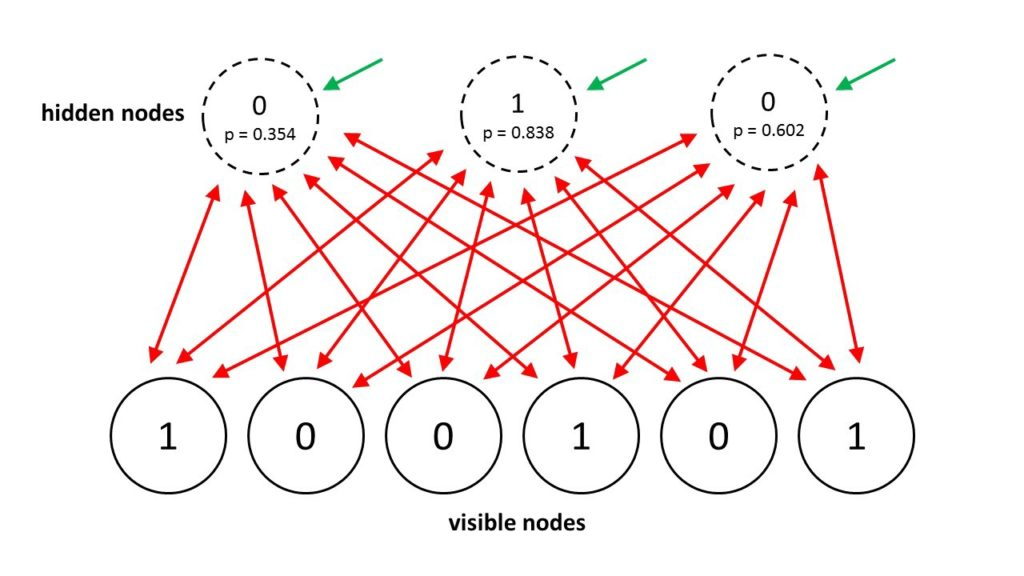

In [9]:
#Máquinas de Boltzmann
from IPython.display import Image
Image(filename="mb.jpg")

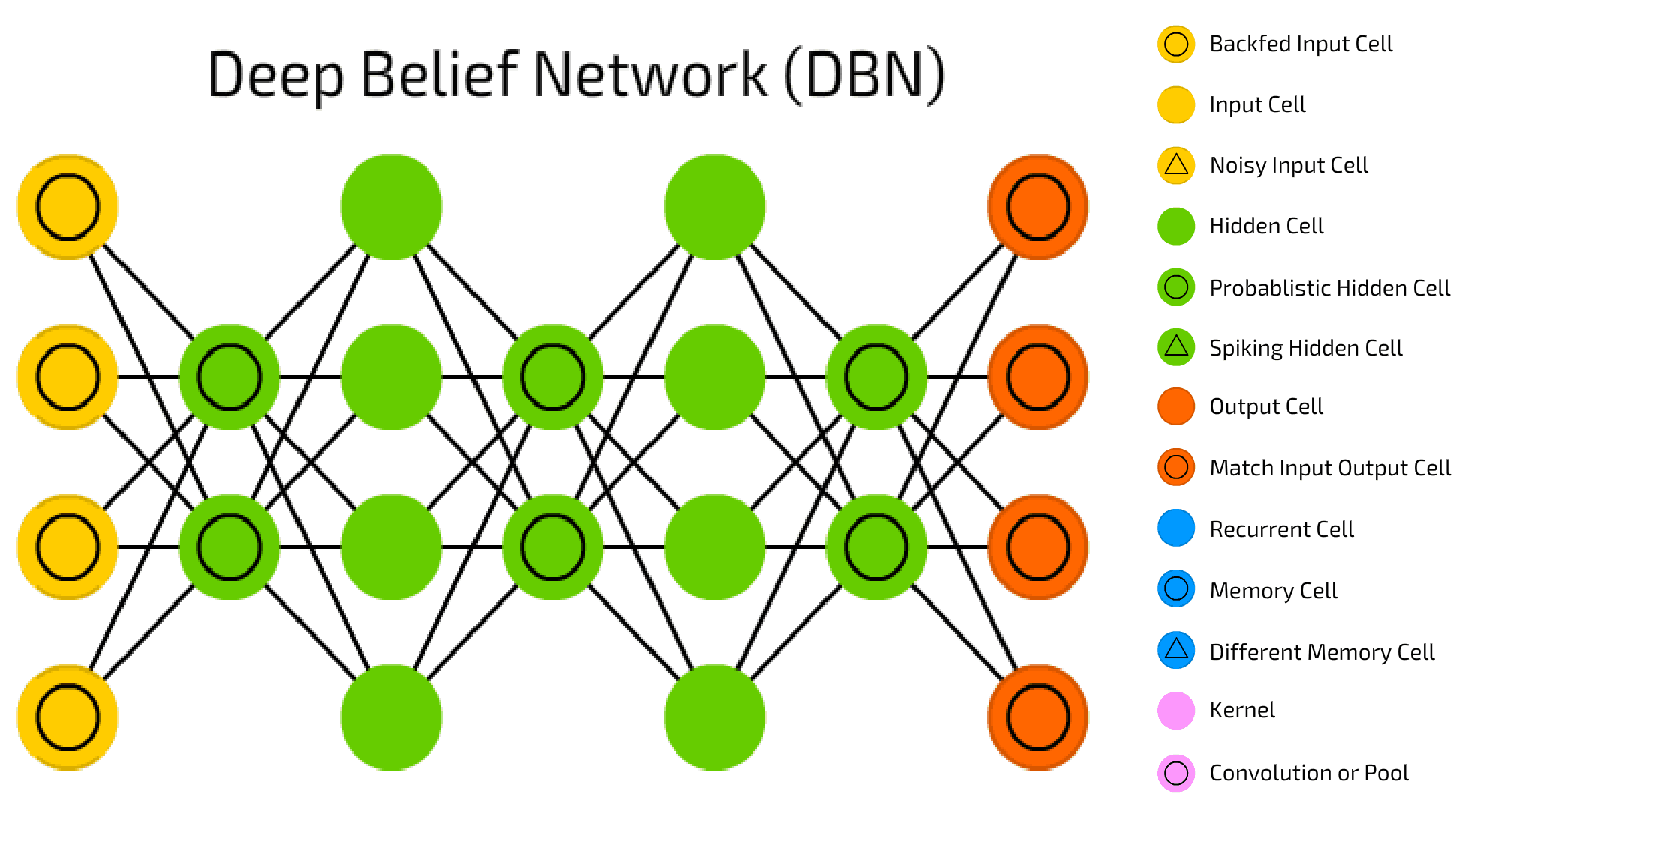

In [10]:
from IPython.display import Image
Image(filename="DBN.PNG")

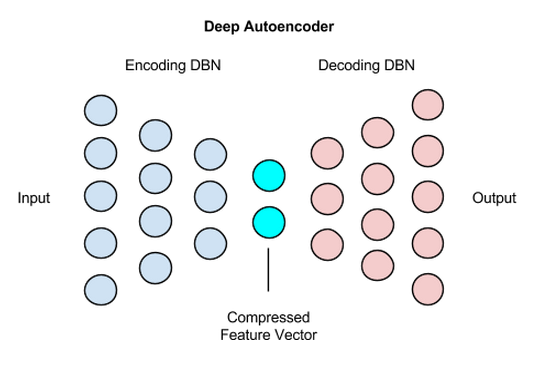

In [11]:
from IPython.display import Image
Image(filename="deep_autoencoder.PNG")

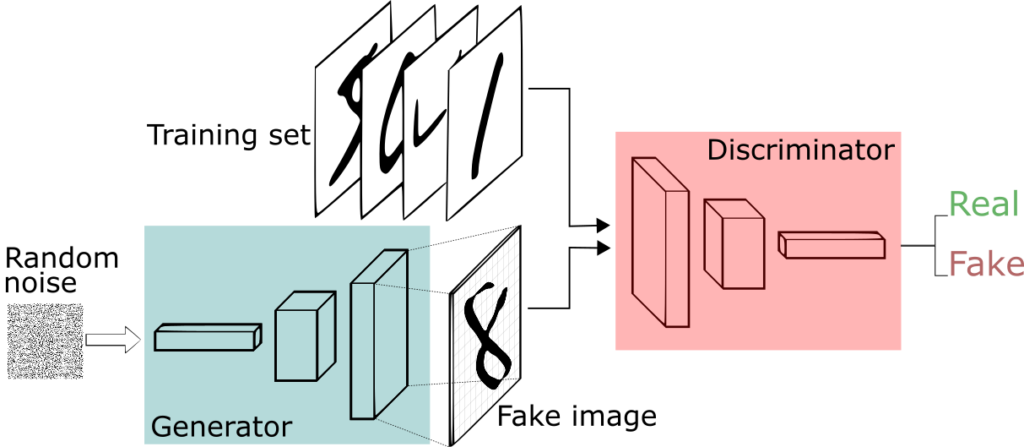

In [12]:
#GANs
from IPython.display import Image
Image(filename="GANs.PNG")

In [20]:
# import the necessary packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import BernoulliRBM
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np
import argparse
import time
import cv2
from sklearn.datasets import fetch_openml
import pandas as pd
from sklearn import linear_model, datasets, metrics
import matplotlib.pyplot as plt

# Banco de dados de imagens

In [416]:
X, y = datasets.load_digits(return_X_y=True)
print(f'Array de pixels:\n {X}')
print(f'\nShape dos dados: {X.shape}')

Array de pixels:
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]

Shape dos dados: (1797, 64)


In [418]:
X[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

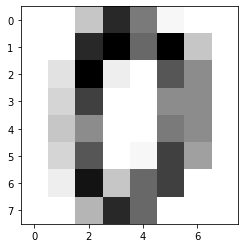

In [419]:
plt.imshow(X[0].reshape(8,8), cmap='Greys')

In [432]:
X_tes = np.where(X > 7, 1, 0)

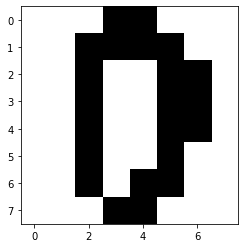

In [433]:
plt.imshow(X_tes[0].reshape(8,8), cmap='Greys')

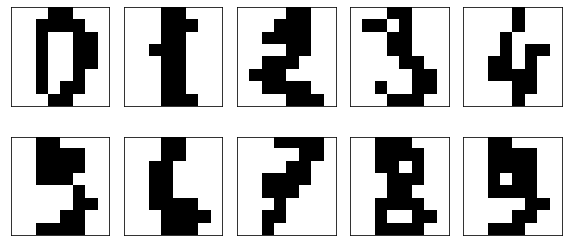

In [434]:
#Verificar a imagem de todos os numeros manuscritos
plt.figure(figsize=(8,4))

for i in range(10):
    
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_tes[i].reshape(8,8), cmap='Greys')
plt.tight_layout()

**Banco de dados em formato de array com shape de 1797 imagens com 64 colunas (8 x 8)**

**OBS: A raiz² do shape das colunas é o tamanho dos pixels de cada imagens, EX: raiz(64) = 8, então os pixels são 8 X 8**

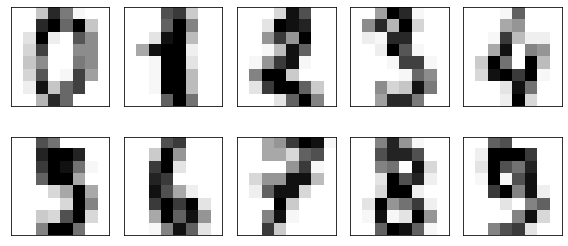

In [22]:
#Verificar a imagem de todos os numeros manuscritos
plt.figure(figsize=(8,4))

for i in range(10):
    
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i].reshape(8,8), cmap='Greys')
plt.tight_layout()

In [23]:
# Variável Target
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**Verificando na imagens e na variável target, temos um range de numero de 0 a 9**

In [24]:
#Tipos de dados
pd.DataFrame(X).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

In [25]:
#Describe
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


**Todas as colunas contém dados do tipo float**

In [26]:
X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001) # 0-1 escala
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.037979,0.325297,0.739735,0.740500,0.361364,0.085141,0.008644,0.002782,0.124617,...,0.232817,0.015881,0.000556,0.031039,0.347348,0.755560,0.738066,0.422751,0.129242,0.022781
std,0.0,0.113398,0.297175,0.265551,0.267960,0.354149,0.207860,0.069158,0.047108,0.199759,...,0.307461,0.075723,0.023588,0.103810,0.318937,0.273417,0.308370,0.368787,0.255658,0.116257
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.062500,0.624996,0.624996,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.062500,0.687496,0.624996,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.249998,0.812495,0.812495,0.249998,0.000000,0.000000,0.000000,0.000000,...,0.062500,0.000000,0.000000,0.000000,0.249998,0.812495,0.874995,0.374998,0.000000,0.000000
75%,0.0,0.000000,0.562496,0.937494,0.937494,0.687496,0.000000,0.000000,0.000000,0.187499,...,0.437497,0.000000,0.000000,0.000000,0.624996,0.999994,0.999994,0.749995,0.124999,0.000000
max,0.0,0.999988,0.999994,0.999994,0.999994,0.999994,0.999994,0.999993,0.999950,0.999994,...,0.999994,0.999992,0.999900,0.999989,0.999994,0.999994,0.999994,0.999994,0.999994,0.999994


# Rede neural Boltzmann (Tentar reproduzir os dados com as mesma dimensões)

- Aplicar redução de dimensionalidade com a rede neural Boltzmann

**Inverter o shape dos dados para reduzir a dimensões dos numeros de variáveis explicativas e não do numero de amostras**

In [81]:
#Rede neural Boltzmann
rede1 = BernoulliRBM(n_components=784, learning_rate=0.01, batch_size=10, n_iter=40, verbose=True, random_state=None)

**Numero de componentes iguais aos dados originais**

In [82]:
rede1.fit(X)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -27.05, time = 0.23s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -25.90, time = 0.34s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -25.87, time = 0.35s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -26.05, time = 0.38s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -26.19, time = 0.35s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -24.69, time = 0.32s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -25.39, time = 0.32s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -25.18, time = 0.32s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -26.17, time = 0.32s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -24.30, time = 0.33s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -24.61, time = 0.33s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -24.18, time = 0.32s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -23.85, time = 0.32s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -22.24, time = 0.38s
[BernoulliRBM] Iteration 15, 

BernoulliRBM(learning_rate=0.01, n_components=784, n_iter=40, verbose=True)

In [83]:
#Shape antes do treinamento da rede
X.shape

(1797, 64)

In [403]:
#Shape da rede de Boltzmann
rede1.components_.shape

(784, 64)

**Reduzir as dimensões para 32 componentes**

In [399]:
#Dados com as dimensões reduzidas
rede1.components_.mean()

-0.00636291312512084

In [391]:
#Matriz de pesos
pd.DataFrame(rede1.components_).describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,...,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,-0.024486,-0.011525,-0.003938,0.000300,0.001905,-0.000409,-0.008142,-0.014035,-0.016807,-0.006756,...,-0.005750,-0.013055,-0.020759,-0.010850,-0.005221,0.000751,0.001258,-0.004632,-0.011584,-0.013075
std,0.010060,0.039104,0.044184,0.036230,0.020208,0.044471,0.055545,0.024421,0.010602,0.043740,...,0.056164,0.027051,0.010257,0.035774,0.046915,0.037423,0.049040,0.055552,0.054292,0.033406
min,-0.062825,-0.133253,-0.151415,-0.136955,-0.055638,-0.126886,-0.162150,-0.086276,-0.048662,-0.135250,...,-0.181973,-0.109557,-0.054412,-0.133271,-0.159424,-0.144327,-0.163616,-0.176131,-0.169095,-0.126525
25%,-0.031186,-0.039989,-0.034299,-0.024281,-0.013187,-0.032705,-0.050591,-0.031154,-0.024002,-0.039336,...,-0.043509,-0.030809,-0.027430,-0.035649,-0.037808,-0.024333,-0.030215,-0.041663,-0.047950,-0.034805
50%,-0.025035,-0.012023,-0.003959,-0.000110,0.002445,0.000033,-0.005457,-0.014562,-0.017251,-0.007317,...,-0.006514,-0.012890,-0.021184,-0.010312,-0.005356,0.001129,-0.000049,-0.005219,-0.012683,-0.014589
75%,-0.017771,0.016739,0.025712,0.024973,0.015655,0.031453,0.029376,0.001947,-0.009626,0.023104,...,0.035369,0.004793,-0.014507,0.013955,0.026637,0.026569,0.032514,0.033378,0.025887,0.009728
max,0.006836,0.119972,0.145287,0.132393,0.061907,0.134621,0.157111,0.052255,0.017130,0.136968,...,0.175384,0.062884,0.018926,0.109219,0.150742,0.142370,0.169116,0.168491,0.155068,0.084089


In [86]:
#Probabilidade do erro na construção dos dados de cada linha em compração com os dados originais
pd.DataFrame(rede1.score_samples(X)).mean()

0   -22.7226
dtype: float64

**Media do erro de todas as variáveis**

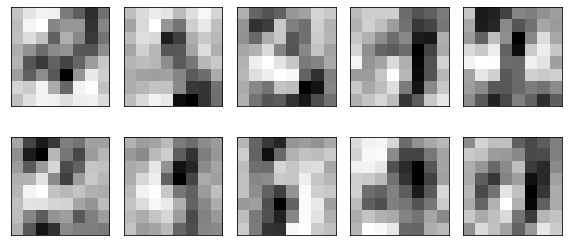

In [509]:
#Verificar a imagem com as novas dimensões
plt.figure(figsize=(8,4))

for i in range(10):
    
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(rede1.components_[i].reshape(8,8), cmap='Greys')
plt.tight_layout()

In [479]:
# Pick a random image from the test set
im_ind = 23
X_pick = X[im_ind]

# Choose 50 random pixels to flip
pick = np.random.choice(8 * 8, 50)
x_noisy = np.copy(X_pick)
x_noisy[pick] = ((X_pick[pick] + 1) % 2)

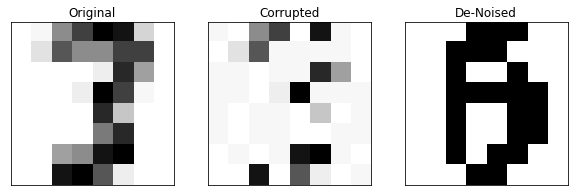

In [508]:
# Perform the denoising
k_iter = 120  # Number of Gibbs Sampling Iterations
alpha = 1  # Decay factor for the averaging

# Gibb sampling steps
b = rede1.gibbs(x_noisy)
x_final = np.zeros(64) + np.copy(b)
for i in range(k_iter):
    b = rede1.gibbs(b)
    x_final += (alpha**(i+1))*b.astype(float) # Averaging the images

# Applying a threshold to binarize the image
x_final = np.where(x_final > 0.5*np.max(x_final), 1, 0)

# Plotting the images
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
ax[0].imshow(X_pick.reshape(8, 8), cmap='Greys')
ax[0].set_title('Original')
ax[1].imshow(x_noisy.reshape(8, 8), cmap='Greys')
ax[1].set_title('Corrupted')
ax[2].imshow(x_final.reshape(8, 8), cmap='Greys')
for i in range(3):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
ax[2].set_title('De-Noised')
plt.show()

In [165]:
rede1.components_[0].shape

(64,)

ValueError: cannot reshape array of size 784 into shape (8,8)

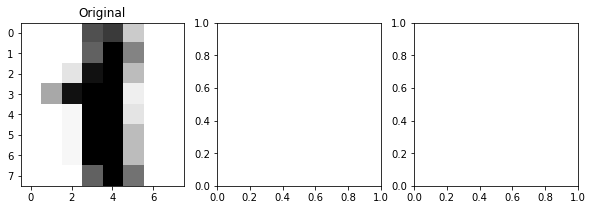

In [478]:
# Perform the denoising
k_iter = 1200  # Number of Gibbs Sampling Iterations
alpha = 0.9  # Decay factor for the averaging

# Gera uma amostra booleana 
b = rede1.gibbs(X[1])

#Converter a amostra em 0 ou 1
x_final = np.zeros(64) + np.copy(b)


for i in range(k_iter):
    
    x_final += (alpha**(i+1))*b.astype(float) # Averaging the images

# Applying a threshold to binarize the image
x_final = np.where(x_final > 0.2*np.max(x_final), 1, 0)

# Plotting the images
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
ax[0].imshow(X[1].reshape(8, 8), cmap='Greys')
ax[0].set_title('Original')
ax[1].imshow(x_noisy.reshape(8, 8), cmap='Greys')
ax[1].set_title('Corrupted')
ax[2].imshow(x_final.reshape(8, 8), cmap='Greys')
for i in range(3):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
ax[2].set_title('De-Noised')
plt.show()

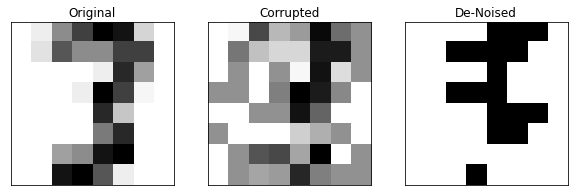

In [343]:
# Plotting the images
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
ax[0].imshow(X_pick.reshape(8, 8), cmap='Greys')
ax[0].set_title('Original')
ax[1].imshow(x_noisy.reshape(8, 8), cmap='Greys')
ax[1].set_title('Corrupted')
ax[2].imshow(x_final.reshape(8, 8), cmap='Greys')
for i in range(3):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
ax[2].set_title('De-Noised')
plt.show()

In [351]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
from sklearn.neural_network import BernoulliRBM
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import mnist
from joblib import dump, load

In [380]:
# Dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 784)/255
X_test = X_test.reshape(-1, 784)/255

# Apply a threshold to binarize the image.
X_train = np.where(X_train > 0.2, 1, 0)
X_test = np.where(X_test > 0.2, 1, 0)

# Split into training and validation sets
X_train, X_val = train_test_split(
    X_train, test_size=1/5,random_state=42)

In [384]:
try:
      # If you have access to our pretrained model
    rbm1 = load('rbm.joblib')  
    print("RBM Reloaded")
except:
    rbm1 = BernoulliRBM(random_state=0, n_components=80,
                    verbose=True, batch_size=20, n_iter=60, learning_rate=0.01)

    rbm1.fit(X_train)
    dump(rbm, 'rbm.joblib') 

RBM Reloaded


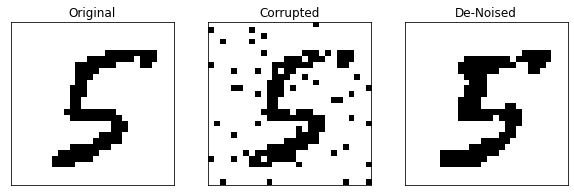

In [477]:
# Pick a random image from the test set
im_ind = 23
X_pick = X_test[im_ind]

# Choose 50 random pixels to flip
pick = np.random.choice(28 * 28, 50)
x_noisy = np.copy(X_pick)
x_noisy[pick] = ((X_pick[pick] + 1) % 2)


# Perform the denoising
k_iter = 12  # Number of Gibbs Sampling Iterations
alpha = 0.9  # Decay factor for the averaging

# Gibb sampling steps
b = rbm1.gibbs(x_noisy)
x_final = np.zeros(784) + np.copy(b)
for i in range(k_iter):
    b = rbm1.gibbs(b)
    x_final += (alpha**(i+1))*b.astype(float) # Averaging the images

# Applying a threshold to binarize the image
x_final = np.where(x_final > 0.5*np.max(x_final), 1, 0)

# Plotting the images
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
ax[0].imshow(X_pick.reshape(28, 28), cmap='Greys')
ax[0].set_title('Original')
ax[1].imshow(x_noisy.reshape(28, 28), cmap='Greys')
ax[1].set_title('Corrupted')
ax[2].imshow(x_final.reshape(28, 28), cmap='Greys')
for i in range(3):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
ax[2].set_title('De-Noised')
plt.show()

In [387]:
x_noisy

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,